In [ ]:
# Tested on Python3.8.10
# !pip install tensorflow==2.12.0
# !pip install seaborn==0.12.2
# !pip install matplotlib==3.7.1
# !pip install numpy==1.23.5
# !pip install pandas==2.0.1
# !pip install cesium==0.12.1
# !pip install prophet==1.1.3
# !pip install scikit_learn==1.2.2
# !pip install openpyxl==3.1.2

In [ ]:
# Importing the libraries
import prophet
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
df_comp = pd.read_excel("../Input/CallCenterData.xlsx")

In [3]:
df_comp.head()

,month,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
0,2010-01-31,631,8,6,2,19,1,4
1,2010-02-28,633,9,7,3,27,1,3
2,2010-03-31,766,4,4,2,24,1,1
3,2010-04-30,768,12,6,3,32,1,1
4,2010-05-31,1003,2,7,2,42,1,4


In [4]:
df_comp.describe()

,month,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
count,132,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2015-07-16 06:10:54.545454592,9856.704545,2411.856061,514.204545,112.454545,651.681818,2.250000,2.537879
min,2010-01-31 00:00:00,631.000000,2.000000,4.000000,2.000000,19.000000,0.000000,1.000000
25%,2012-10-23 06:00:00,3744.250000,608.750000,119.000000,39.750000,363.500000,1.000000,1.000000
50%,2015-07-15 12:00:00,9651.500000,2613.500000,486.000000,130.500000,581.000000,2.000000,3.000000
75%,2018-04-07 12:00:00,15590.750000,4000.500000,901.500000,171.250000,997.750000,3.000000,4.000000
max,2020-12-31 00:00:00,23602.000000,5138.000000,1310.000000,229.000000,1535.000000,11.000000,4.000000
std,NaN,6221.071304,1714.759241,392.882978,69.680773,395.949633,1.867255,1.161766


In [5]:
# Checking the null values
df_comp.isna().sum()

month            0
Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

In [6]:
df_comp.month.describe()

count                              132
mean     2015-07-16 06:10:54.545454592
min                2010-01-31 00:00:00
25%                2012-10-23 06:00:00
50%                2015-07-15 12:00:00
75%                2018-04-07 12:00:00
max                2020-12-31 00:00:00
Name: month, dtype: object

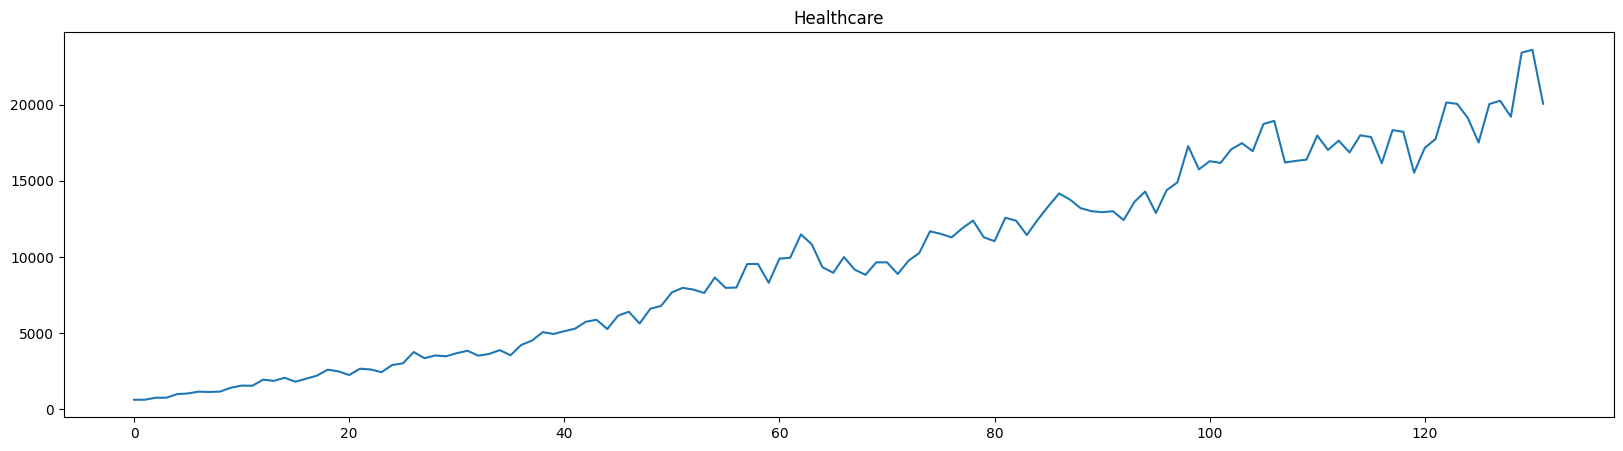

In [7]:
df_comp.Healthcare.plot(figsize=(20,5), title="Healthcare")
plt.show()

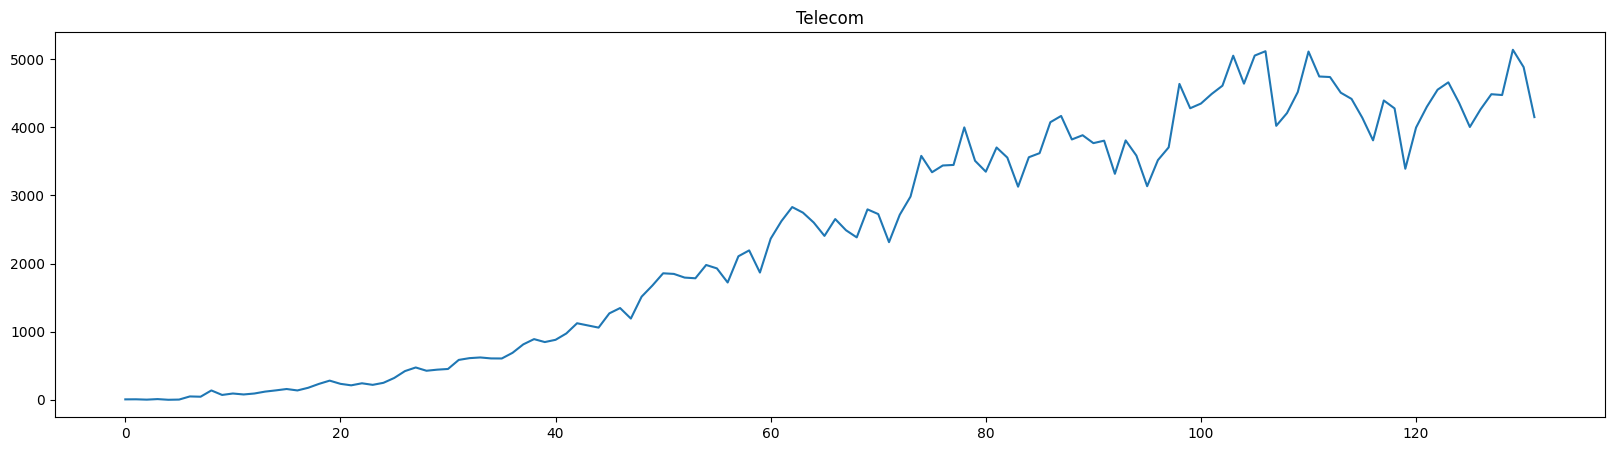

In [8]:
df_comp.Telecom.plot(figsize=(20,5), title="Telecom")
plt.show()

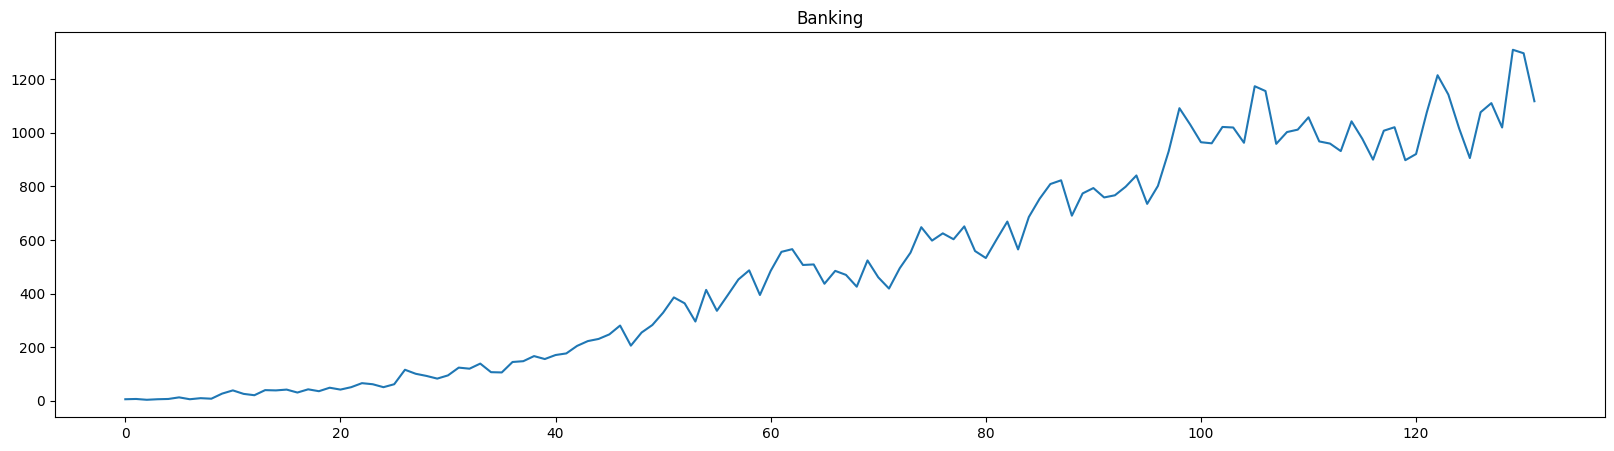

In [9]:
df_comp.Banking.plot(figsize=(20,5), title="Banking")
plt.show()

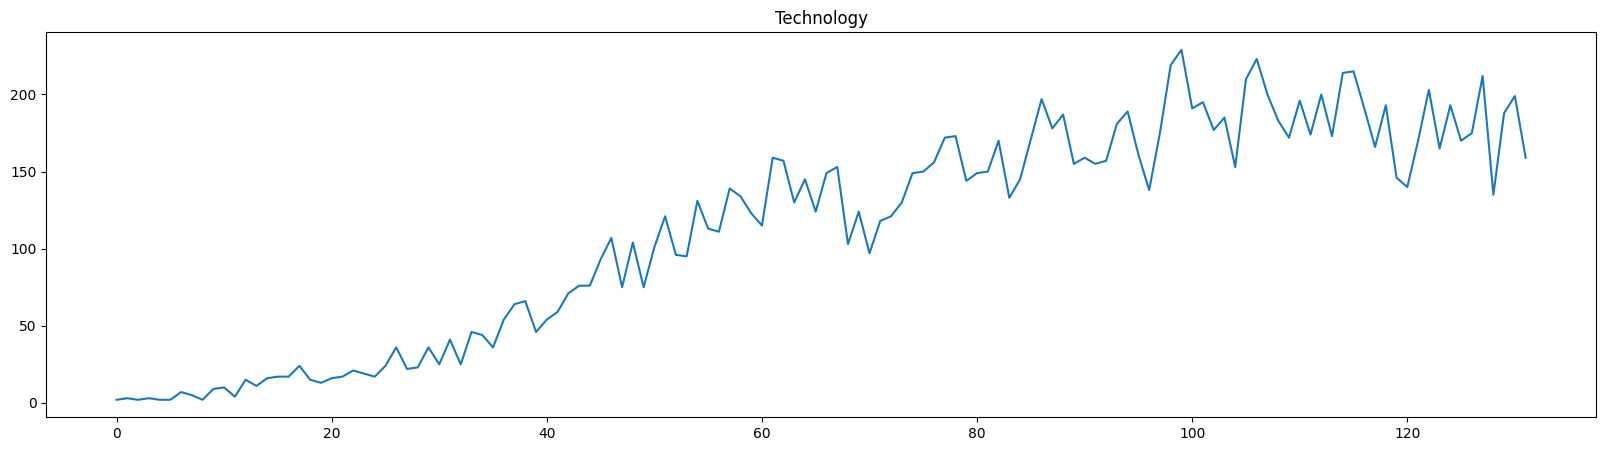

In [10]:
df_comp.Technology.plot(figsize=(20,5), title="Technology")
plt.show()

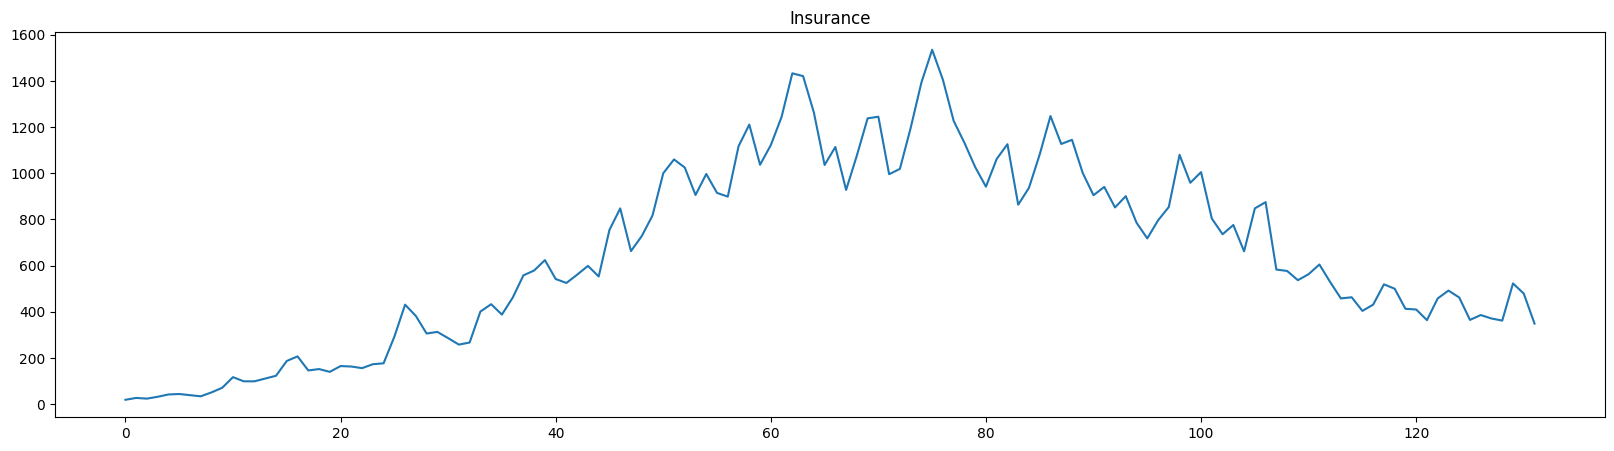

In [11]:
df_comp.Insurance.plot(figsize=(20,5), title="Insurance")
plt.show()

---

## Setting the data for FBProphet

In [13]:
df = df_comp[["month", "Healthcare"]]

In [14]:
df.head()

,month,Healthcare
0,2010-01-31,631
1,2010-02-28,633
2,2010-03-31,766
3,2010-04-30,768
4,2010-05-31,1003


In [15]:
# Renaming DataFrame columns to match the desired format

df = df.rename(columns={'month': 'ds', 'Healthcare': 'y'})


In [16]:
df.head()

,ds,y
0,2010-01-31,631
1,2010-02-28,633
2,2010-03-31,766
3,2010-04-30,768
4,2010-05-31,1003


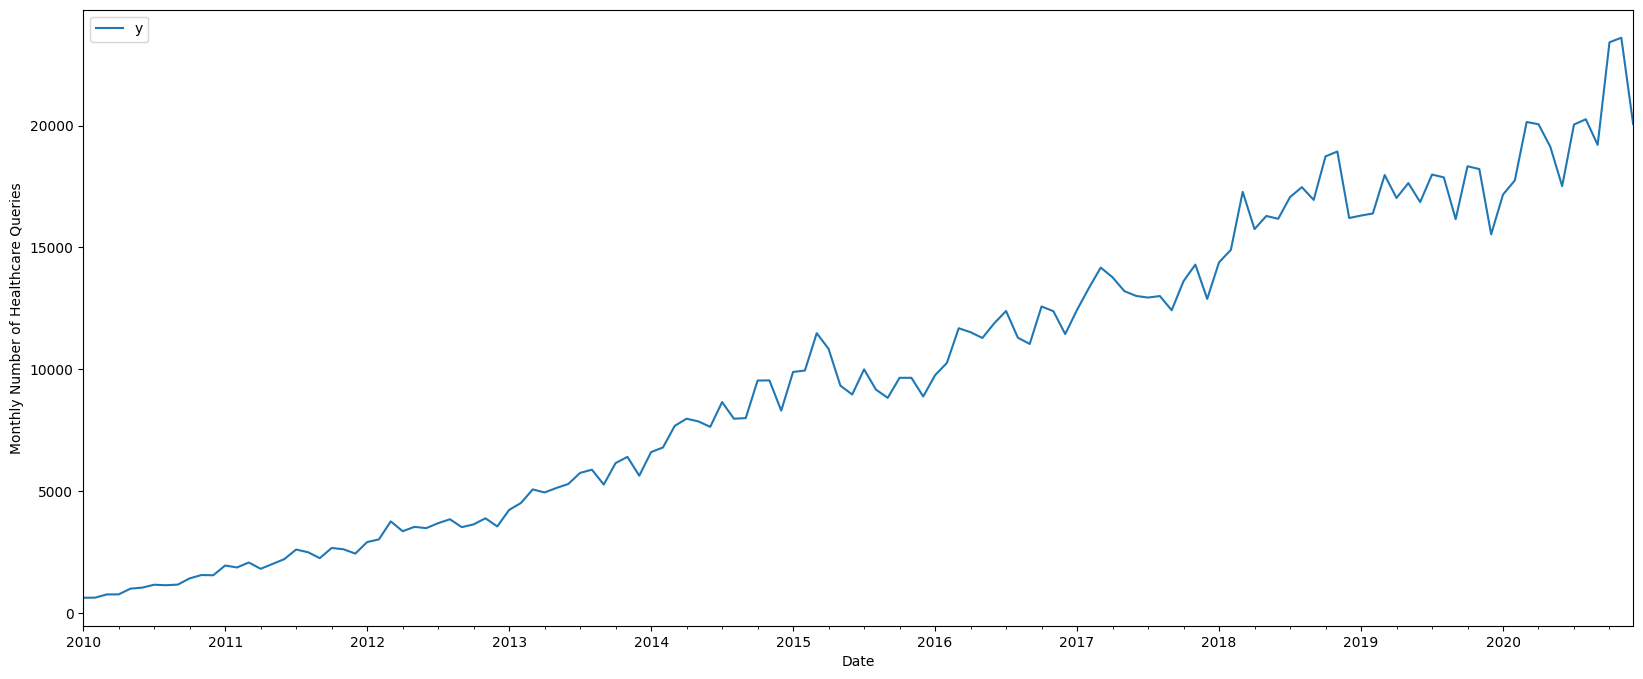

In [17]:
# Create a line plot to visualize the monthly number of healthcare queries over time

# Set the "ds" column as the index for the DataFrame
ax = df.set_index('ds').plot(figsize=(20, 8))

# Set the y-axis label
ax.set_ylabel('Monthly Number of Healthcare Queries')

# Set the x-axis label
ax.set_xlabel('Date')

# Display the plot
plt.show()


In [19]:
# Setting the fbprophet libraries
from prophet import Prophet
from prophet.plot import plot_plotly

In [20]:
# Define a Prophet model with a prediction interval of 95%

fb_model = Prophet(interval_width=0.95)


In [21]:
# Fitting the model
fb_model.fit(df)

13:24:51 - cmdstanpy - INFO - Chain [1] start processing
13:24:54 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Generate future dates for forecasting with a frequency of monthly data points

# Create a DataFrame with future dates for the next 12 months (periods=12) with a monthly frequency (freq='M')
future_dates_healthcare = fb_model.make_future_dataframe(periods=12, freq='M')

# Display the last few rows of the future dates DataFrame
future_dates_healthcare.tail()


,ds
139,2021-08-31
140,2021-09-30
141,2021-10-31
142,2021-11-30
143,2021-12-31


In [23]:
# Predicting the range of values for the future dates

# Use the Prophet model to make predictions for the future dates
forecast = fb_model.predict(future_dates_healthcare)

# Extract the columns 'ds' (date), 'yhat' (predicted value), 'yhat_lower' (lower bound), and 'yhat_upper' (upper bound)
# to describe the predicted range of values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
139,2021-08-31,21940.866289,20471.420538,23353.173766
140,2021-09-30,21414.234429,19945.523053,22872.556000
141,2021-10-31,22871.197633,21304.374324,24191.977503
142,2021-11-30,23027.741403,21468.687180,24459.704779
143,2021-12-31,21674.783055,20269.627551,23119.633017


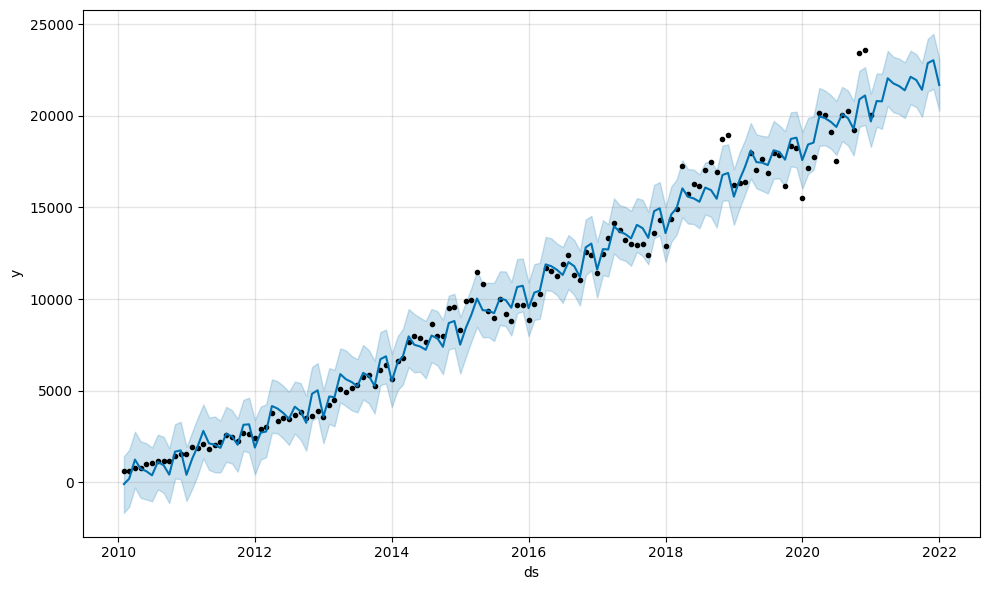

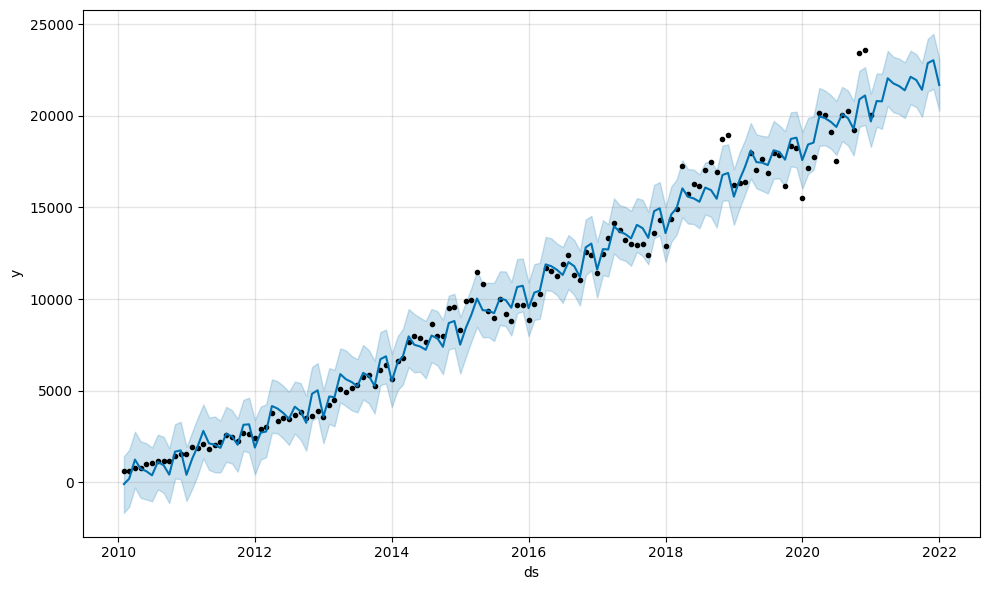

In [24]:
# Create a plot to visualize the forecasted values and uncertainty
fb_model.plot(forecast, uncertainty=True)


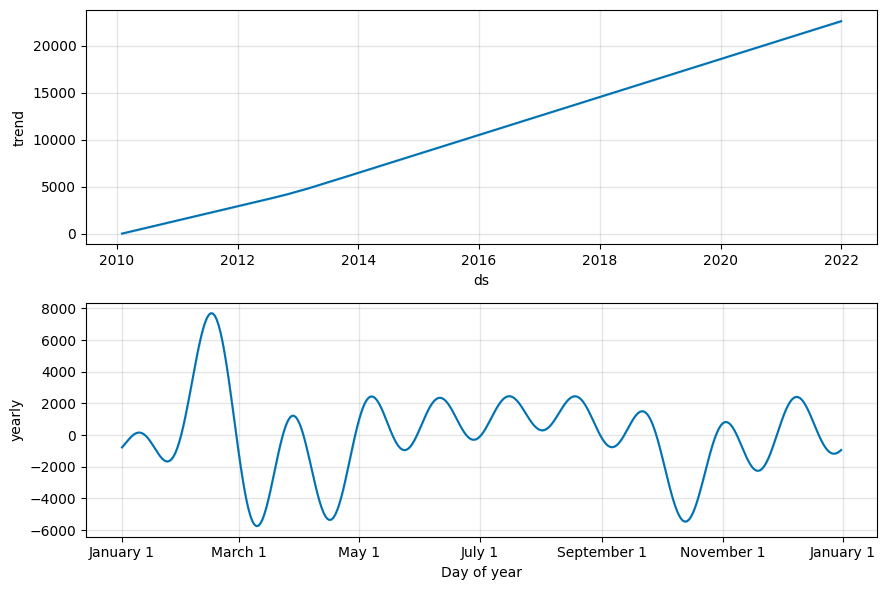

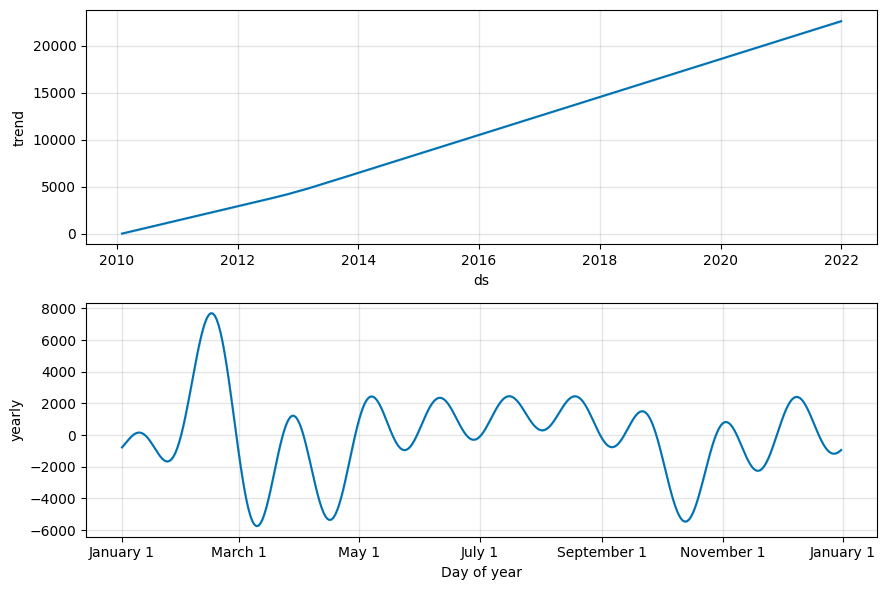

In [25]:
# Create plots to visualize the components of the time series forecast
fb_model.plot_components(forecast)


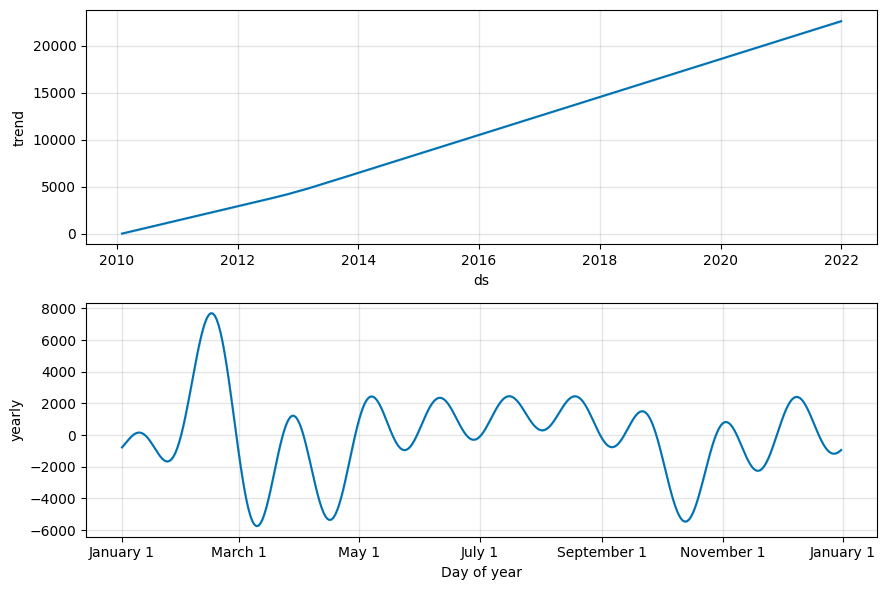

In [26]:
# Create plots to visualize the components of the time series forecast and store the figure in fig1

fig1 = fb_model.plot_components(forecast)


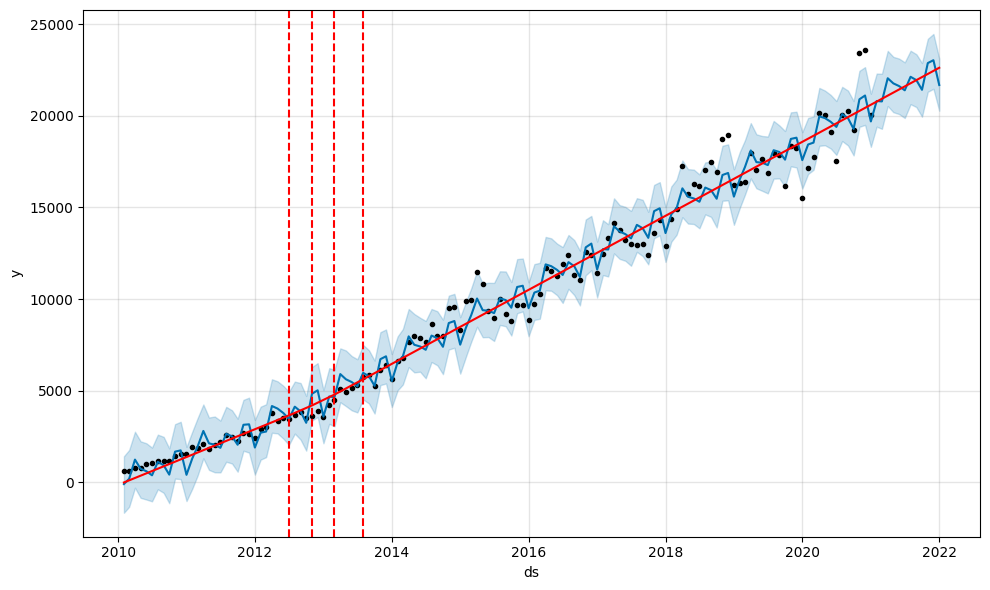

In [27]:
# Add changepoints to the Prophet forecast plot

# First, create a plot of the forecast
from prophet.plot import add_changepoints_to_plot
fig = fb_model.plot(forecast)

# Then, add changepoints to the plot
a = add_changepoints_to_plot(fig.gca(), fb_model, forecast)


In [28]:
fb_model.changepoints

4     2010-05-31
8     2010-09-30
12    2011-01-31
17    2011-06-30
21    2011-10-31
25    2012-02-29
29    2012-06-30
33    2012-10-31
37    2013-02-28
42    2013-07-31
46    2013-11-30
50    2014-03-31
54    2014-07-31
58    2014-11-30
62    2015-03-31
67    2015-08-31
71    2015-12-31
75    2016-04-30
79    2016-08-31
83    2016-12-31
87    2017-04-30
92    2017-09-30
96    2018-01-31
100   2018-05-31
104   2018-09-30
Name: ds, dtype: datetime64[ns]

13:25:22 - cmdstanpy - INFO - Chain [1] start processing
13:25:22 - cmdstanpy - INFO - Chain [1] done processing


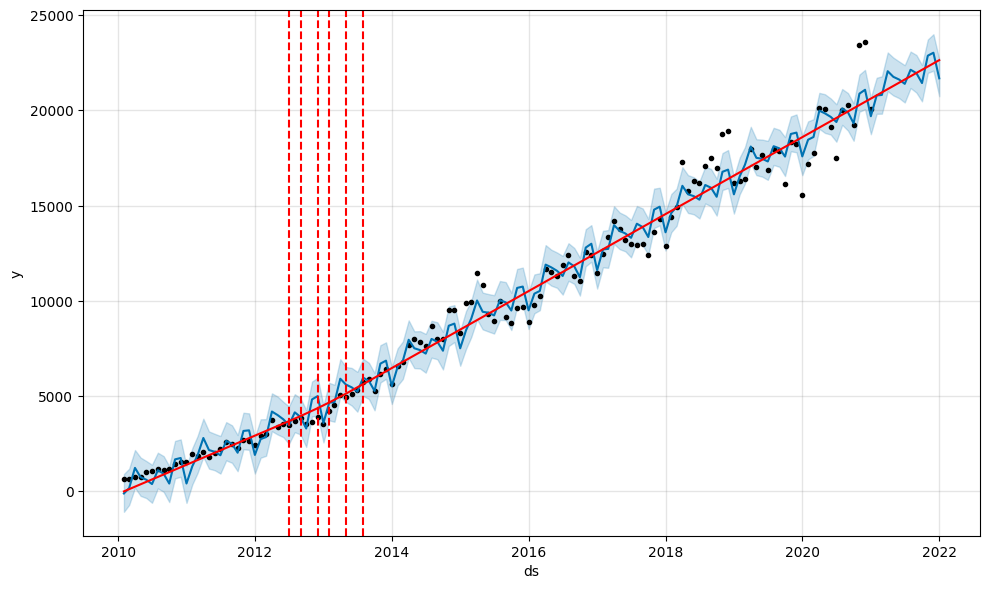

In [29]:
# Modify the changepoint range for a new Prophet model

# Create a new Prophet model with a changepoint range of 0.5
pro_change = Prophet(changepoint_range=0.5)

# Fit the model with the original data and generate a forecast using future dates
forecast = pro_change.fit(df).predict(future_dates_healthcare)

# Create a plot of the forecast
fig = pro_change.plot(forecast)

# Add changepoints to the plot
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)


13:25:24 - cmdstanpy - INFO - Chain [1] start processing
13:25:25 - cmdstanpy - INFO - Chain [1] done processing


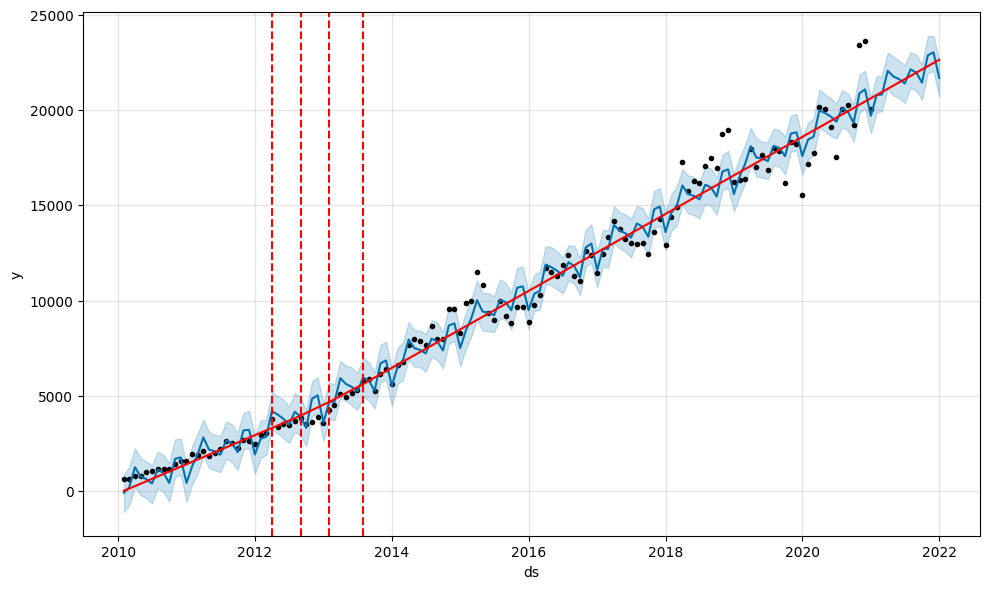

In [30]:
# Configure a new Prophet model with a specified number of changepoints and yearly seasonality

# Create a new Prophet model with 20 changepoints and yearly seasonality enabled
pro_change = Prophet(n_changepoints=20, yearly_seasonality=True)

# Fit the model with the original data and generate a forecast using future dates
forecast = pro_change.fit(df).predict(future_dates_healthcare)

# Create a plot of the forecast
fig = pro_change.plot(forecast)

# Add changepoints to the plot
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)


13:25:26 - cmdstanpy - INFO - Chain [1] start processing
13:25:27 - cmdstanpy - INFO - Chain [1] done processing


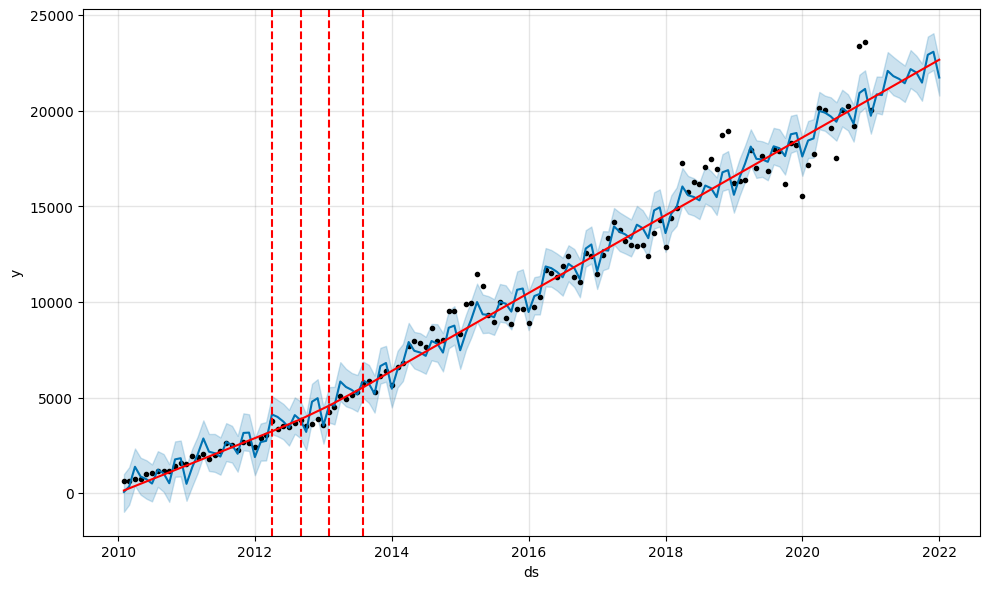

In [31]:
# Configure a new Prophet model with a specified number of changepoints, yearly seasonality, and changepoint prior scale

# Create a new Prophet model with 20 changepoints, yearly seasonality enabled, and a changepoint prior scale of 0.08
pro_change = Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)

# Fit the model with the original data and generate a forecast using future dates
forecast = pro_change.fit(df).predict(future_dates_healthcare)

# Create a plot of the forecast
fig = pro_change.plot(forecast)

# Add changepoints to the plot
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)


13:25:30 - cmdstanpy - INFO - Chain [1] start processing
13:25:31 - cmdstanpy - INFO - Chain [1] done processing


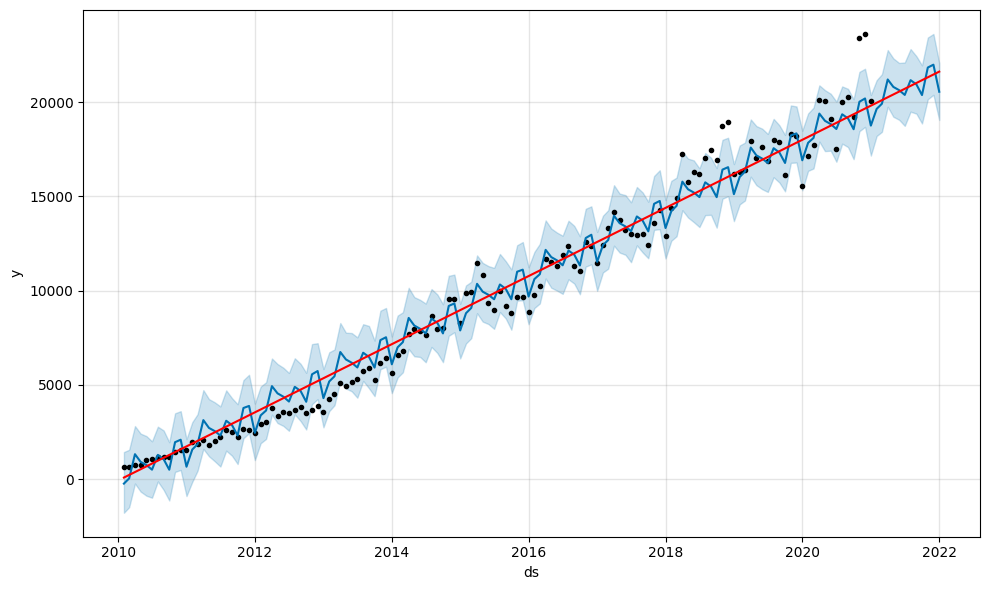

In [32]:
# Configure a new Prophet model with a specified number of changepoints, yearly seasonality, and a lower changepoint prior scale

# Create a new Prophet model with 20 changepoints, yearly seasonality enabled, and a changepoint prior scale of 0.001
pro_change = Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)

# Fit the model with the original data and generate a forecast using future dates
forecast = pro_change.fit(df).predict(future_dates_healthcare)

# Create a plot of the forecast
fig = pro_change.plot(forecast)

# Add changepoints to the plot
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)


In [33]:
# Save the trained Prophet model to a file using Pickle

import pickle

# Open a file in binary write mode and save the fb_model using Pickle
with open("../Output/models/p_model", "wb") as f:
    pickle.dump(fb_model, f)


---